In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

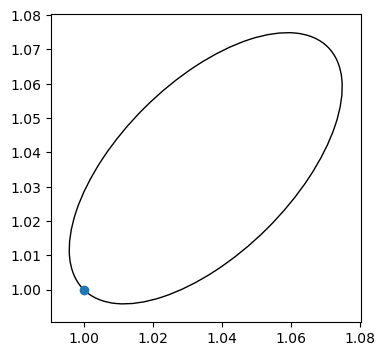

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(4, 4))


def add_loop(point, width=0.1, ratio=0.5, angle=45, ax: plt.Axes | None = None, **kwargs):
    
    if ax is None:
        ax = plt.gca()
    
    # convert point to NumPy array
    point = np.array(point)
    
    # set height of ellipse
    height = width * ratio
    
    # compute the directional vector of the given angle
    rad = np.deg2rad(angle)
    direction = np.array([np.cos(rad), np.sin(rad)])

    # compute center of ellipse
    center = point + (width / 2) * direction
    
    # draw closed loop about the given point
    loop = patches.Arc(center, width, height, angle, **kwargs)
    ax.add_patch(loop)

plt.scatter([1], [1])
add_loop((1, 1), zorder=-1)
plt.show()

In [4]:
G = nx.MultiGraph()
G.add_edge(1, 2)
G.add_edge(1, 2)
G.add_edge(1, 2)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 3)
G.add_edge(1, 5)
G.add_edge(5, 5)
G.add_edge(5, 5)
G.add_edge(5, 5)

2

In [5]:
edge_list = list(G.edges)
edge_list

[(1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 5, 0),
 (2, 3, 0),
 (3, 4, 0),
 (4, 5, 0),
 (5, 5, 0),
 (5, 5, 1),
 (5, 5, 2)]

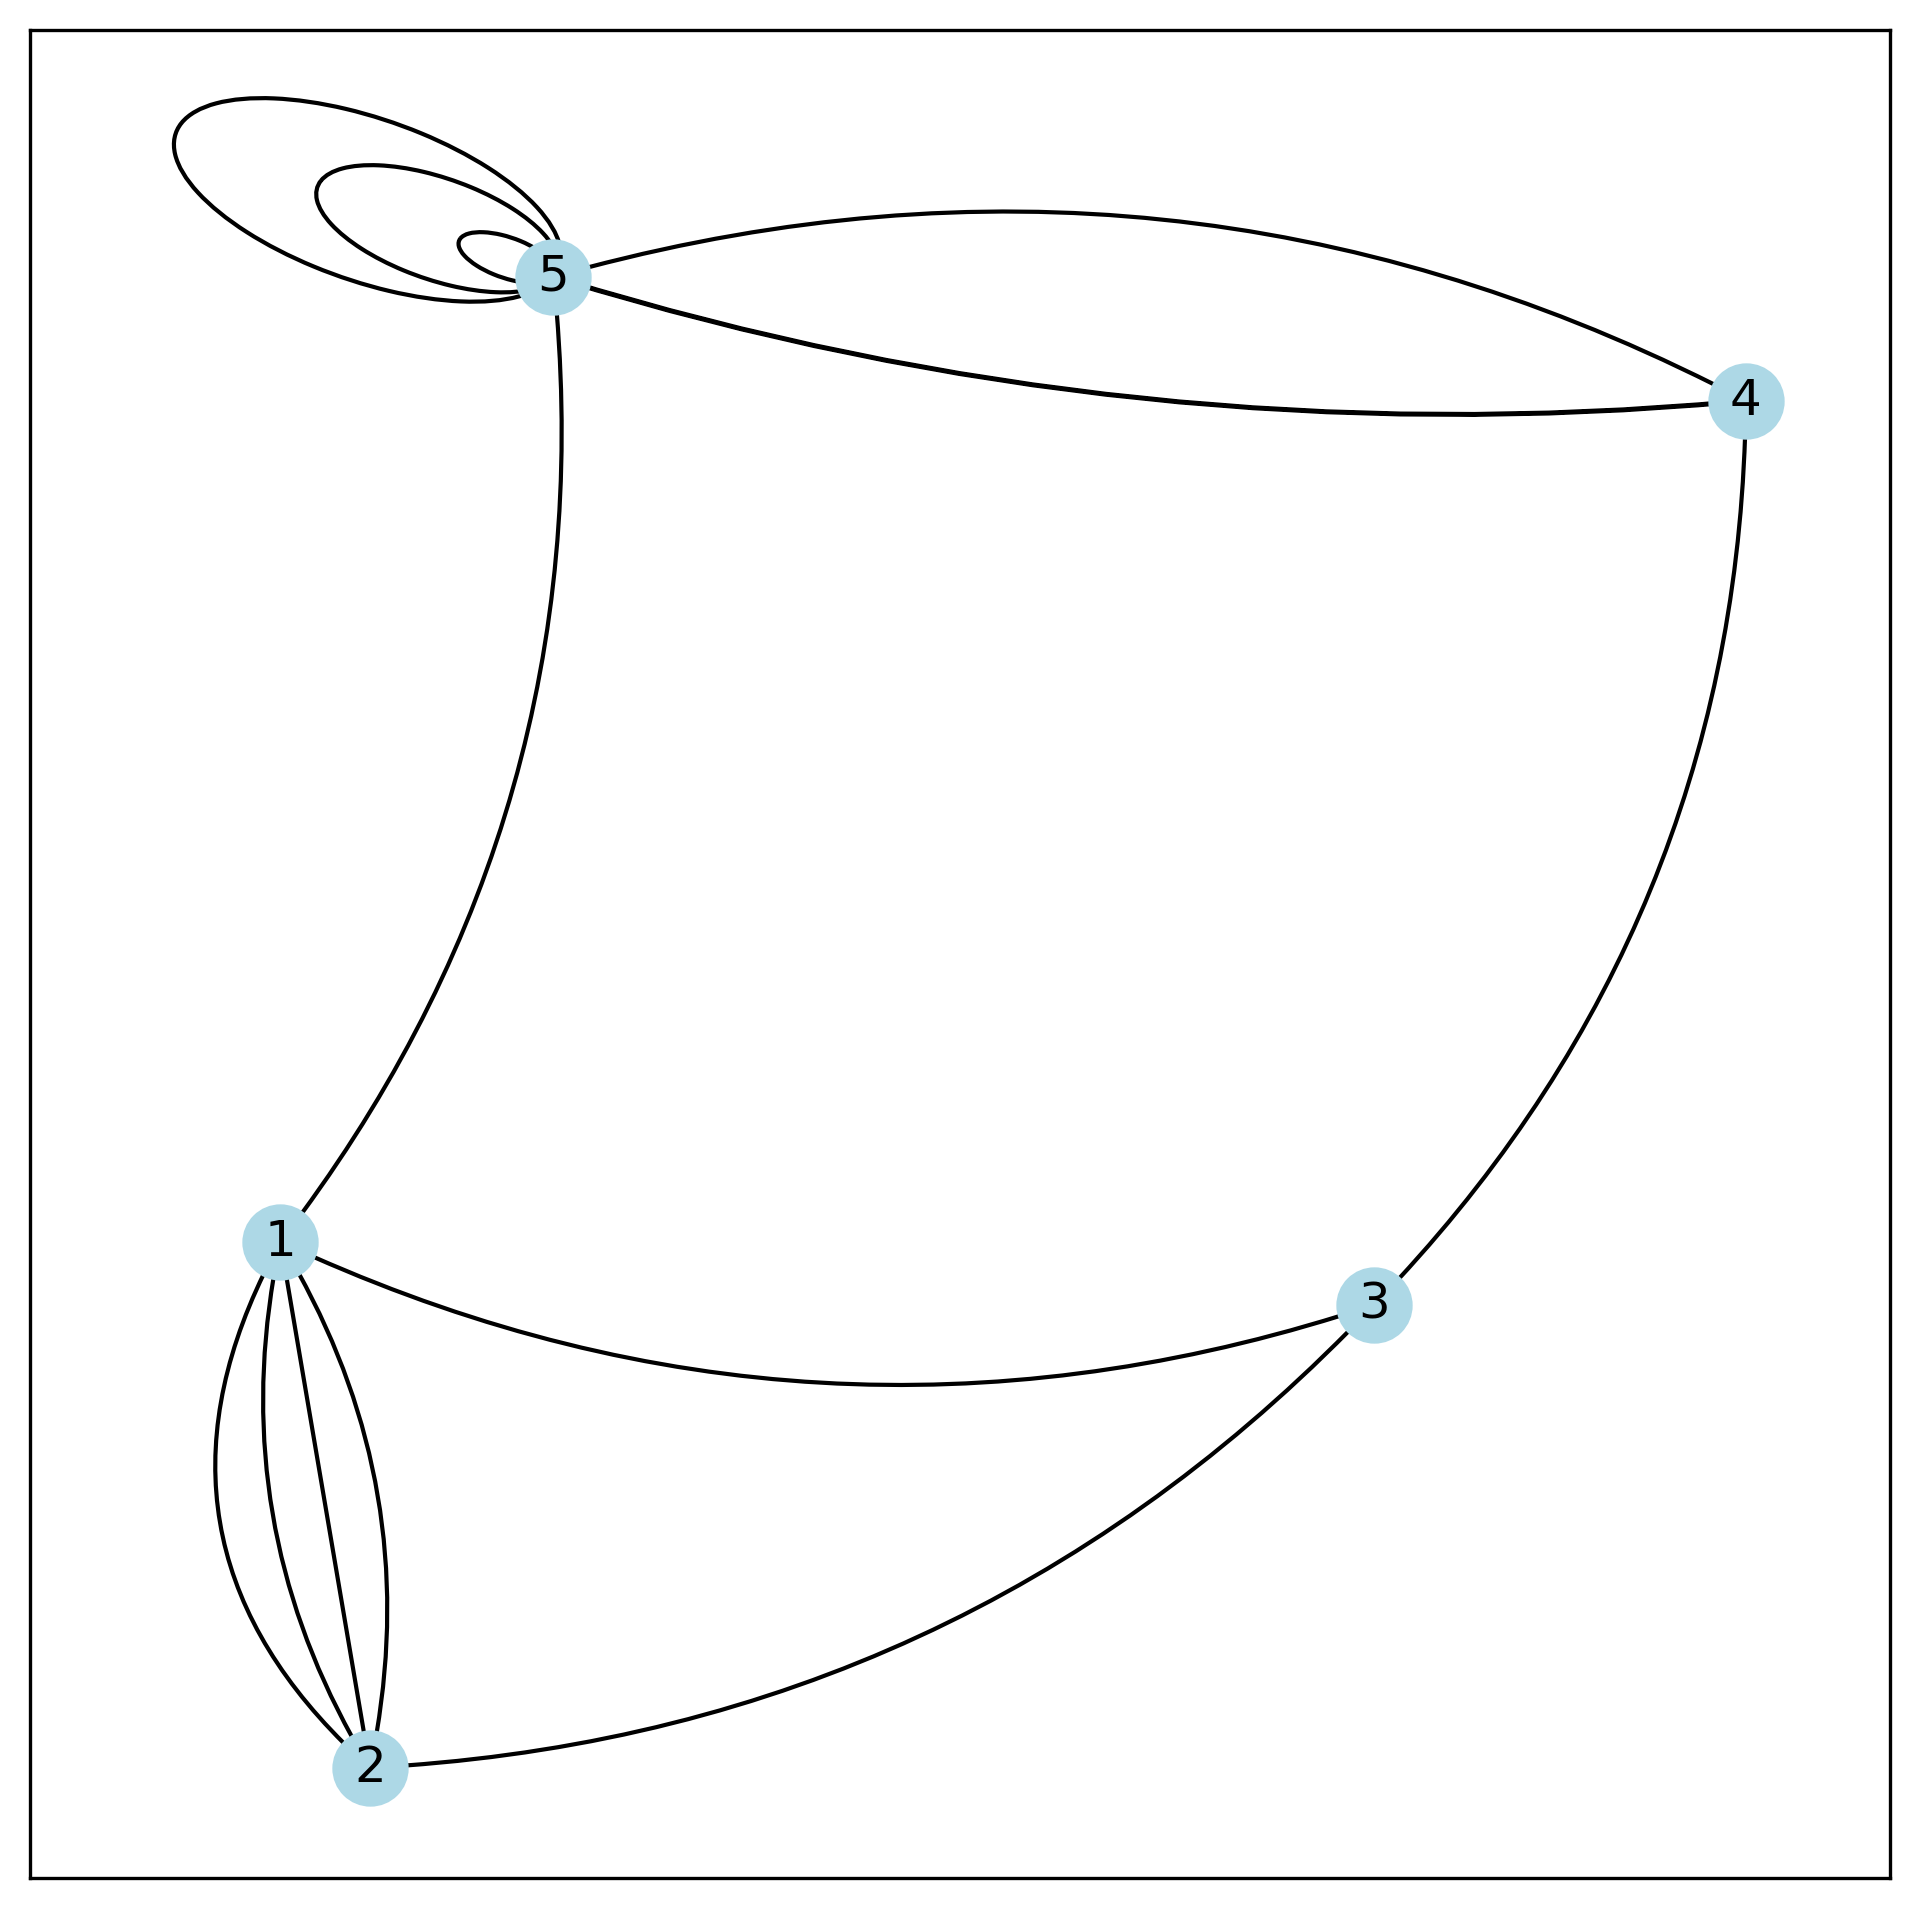

In [6]:
np.random.seed(43)

fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
options = {
    "with_labels": True,
    "node_color": "lightblue"
}
edges = list(G.edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue")
nx.draw_networkx_labels(G, pos)

for edge in edge_list:
    u, v, key = edge
    delta_rad = 0.1
    sign = (-1)**(key % 2)
    mag = np.floor(key / 2) * 2 + 1
    rad = 0.1 + sign * mag * delta_rad
    
    if u == v:
        add_loop(pos[u], width=0.1 + 0.3 * key / 2, angle=150)
        continue
    
    nx.draw_networkx_edges(
        G, pos, 
        edgelist=[edge], 
        arrows=True,
        connectionstyle=f"arc3, rad={rad}"
    )
a = patches.FancyArrowPatch(pos[5], pos[4], connectionstyle="arc3,rad=.1")
ax.add_patch(a)
plt.show()